<a href="https://colab.research.google.com/github/gashawmg/molecular-descriptors/blob/main/Molecular%20descriptors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Calculating molecular descriptors using RDkit and Mordred 

In [1]:
!pip install rdkit-pypi
!pip install mordred

In [2]:
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors

In [3]:
# import session_info
# session_info.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [6]:
url = 'https://raw.githubusercontent.com/MuthusaravananS/PAK1_inhibitors/main/PubChem_chemicalvendor%20library.csv'
dataset = pd.read_csv(url)
dataset.shape

(4239, 2)

In [5]:
dataset = pd.read_csv('pak1_03_bioactivity_data_curated.csv')
dataset.shape

(263, 4)

In [6]:
dataset.head()

,molecule_chembl_id,canonical_smiles,class,pIC50
0,CHEMBL271139,c1nc(NC2CCCC2)c2nc[nH]c2n1,inactive,4.744727
1,CHEMBL259041,CCCCCSc1ncnc2[nH]cnc12,inactive,4.420216
2,CHEMBL259040,c1nc2cnc(NC3CCCCC3)nc2[nH]1,inactive,4.508638
3,CHEMBL408244,CC(Sc1ncnc2[nH]cnc12)c1ccccc1Cl,inactive,4.638272
4,CHEMBL407278,CC1CC(Nc2ncnc3[nH]cnc23)CC(C)(C)C1,inactive,4.638272


## 1. Generate canonical SMILES

In [7]:
# There might be one or more valid SMILES that can represent one compound
# Thanks to Pat Walters for this information,checkout his excellent blog: https://www.blogger.com/profile/18223198920629617711
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles] 
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

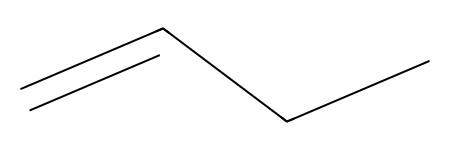

In [8]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Chem.MolFromSmiles('C=CCC')

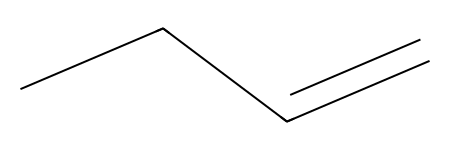

In [9]:
Chem.MolFromSmiles('CCC=C')

In [11]:
# Canonical SMILES
Canon_SMILES = canonical_smiles(dataset.canonical_smiles)
len(Canon_SMILES)

263

In [12]:
# Put the smiles in the dataframe
dataset['canonical_smiles'] = Canon_SMILES
dataset

,molecule_chembl_id,canonical_smiles,class,pIC50
0,CHEMBL271139,c1nc(NC2CCCC2)c2nc[nH]c2n1,inactive,4.744727
1,CHEMBL259041,CCCCCSc1ncnc2[nH]cnc12,inactive,4.420216
2,CHEMBL259040,c1nc2cnc(NC3CCCCC3)nc2[nH]1,inactive,4.508638
3,CHEMBL408244,CC(Sc1ncnc2[nH]cnc12)c1ccccc1Cl,inactive,4.638272
4,CHEMBL407278,CC1CC(Nc2ncnc3[nH]cnc23)CC(C)(C)C1,inactive,4.638272
...,...,...,...,...
258,CHEMBL4776761,O=C(Nc1ccc(Cl)c(Cl)c1)NC1CCN(c2ncnc3[nH]ncc23)CC1,active,5.640165
259,CHEMBL4787813,O=C(Nc1ccc(F)cc1F)NC1CCN(c2ncnc3[nH]ncc23)CC1,active,5.943095
260,CHEMBL4780410,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)NC1CCN(c2ncn...,active,6.769551
261,CHEMBL4791790,O=C(Nc1cccc2ccccc12)NC1CCN(c2ncnc3[nH]ncc23)CC1,inactive,4.953115


In [13]:
# Create a list for duplicate smiles
duplicates_smiles = dataset[dataset['canonical_smiles'].duplicated()]['canonical_smiles'].values
len(duplicates_smiles)

0

In [15]:


31

# Create a list for duplicate smiles
dataset[dataset['canonical_smiles'].isin(duplicates_smiles)].sort_values(by=['canonical_smiles'])



dataset_new = dataset.drop_duplicates(subset=['canonical_smiles'])
len(dataset_new)



263

## Calculate descriptors using RDkit

### a. General molecular descriptors-about 208 molecular descriptors

---



In [18]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(dataset_new['canonical_smiles'])

In [19]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.405392,-3.567918,8.405392,0.190324,0.779302,203.249,190.145,203.117095,78,0,...,0,0,0,0,0,0,0,0,0,0
1,8.027036,-3.826332,8.027036,0.073484,0.479794,222.317,208.205,222.093917,80,0,...,1,0,0,0,0,0,0,0,0,0
2,8.489020,-3.858482,8.489020,0.323751,0.807999,217.276,202.156,217.132745,84,0,...,0,0,0,0,0,0,0,0,0,0
3,8.720346,-3.174286,8.720346,0.200154,0.587710,290.779,279.691,290.039295,96,0,...,1,0,0,0,0,0,0,0,0,0
4,9.005392,-4.658624,9.005392,0.192640,0.869763,259.357,238.189,259.179696,102,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,13.334900,-4.232521,13.334900,0.215771,0.619001,406.277,389.141,405.087164,140,0,...,0,0,0,0,0,0,0,0,0,1
259,14.690008,-4.355645,14.690008,0.181323,0.654910,373.367,356.231,373.146265,140,0,...,0,0,0,0,0,0,0,0,0,1
260,13.717881,-5.965837,13.717881,0.101056,0.496077,473.381,456.245,473.139877,176,0,...,0,0,0,0,0,0,0,0,0,1
261,13.783675,-4.337614,13.783675,0.195802,0.500955,387.447,366.279,387.180758,146,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_with_200_descriptors.to_csv('rdkitinputfinal.csv')
from google.colab import drive
drive.mount('drive',force_remount=True)
!cp rdkitinputfinal.csv "drive/My Drive/"

In [21]:
df_with_200_descriptors_num = df_with_200_descriptors.select_dtypes(exclude='number')
df_with_200_descriptors.drop(df_with_200_descriptors_num, axis=0, inplace=True)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.405392,-3.567918,8.405392,0.190324,0.779302,203.249,190.145,203.117095,78,0,...,0,0,0,0,0,0,0,0,0,0
1,8.027036,-3.826332,8.027036,0.073484,0.479794,222.317,208.205,222.093917,80,0,...,1,0,0,0,0,0,0,0,0,0
2,8.489020,-3.858482,8.489020,0.323751,0.807999,217.276,202.156,217.132745,84,0,...,0,0,0,0,0,0,0,0,0,0
3,8.720346,-3.174286,8.720346,0.200154,0.587710,290.779,279.691,290.039295,96,0,...,1,0,0,0,0,0,0,0,0,0
4,9.005392,-4.658624,9.005392,0.192640,0.869763,259.357,238.189,259.179696,102,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,13.334900,-4.232521,13.334900,0.215771,0.619001,406.277,389.141,405.087164,140,0,...,0,0,0,0,0,0,0,0,0,1
259,14.690008,-4.355645,14.690008,0.181323,0.654910,373.367,356.231,373.146265,140,0,...,0,0,0,0,0,0,0,0,0,1
260,13.717881,-5.965837,13.717881,0.101056,0.496077,473.381,456.245,473.139877,176,0,...,0,0,0,0,0,0,0,0,0,1
261,13.783675,-4.337614,13.783675,0.195802,0.500955,387.447,366.279,387.180758,146,0,...,0,0,0,0,0,0,0,0,0,1


## Calculate descreptors using Mordred-1826 descriptors

In [20]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=True
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

SyntaxError: invalid syntax (3069932986.py, line 3)

In [19]:
mordred_descriptors = All_Mordred_descriptors(dataset_new['canonical_smiles'])

 21%|██▏       | 357/1662 [02:49<09:14,  2.35it/s]

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 60%|██████    | 1002/1662 [08:23<08:41,  1.27it/s]

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 1662/1662 [14:06<00:00,  1.96it/s]


In [20]:
mordred_descriptors.shape

(1662, 1826)

In [21]:
mordred_descriptors

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,18.211445,14.907513,0,0,28.497004,2.49716,4.866136,28.497004,1.239,4.073476,...,10.094562,71.858690,308.138559,7.900989,1204,34,124.0,144.0,8.340278,4.819444
1,16.470305,13.419885,0,0,27.27672,2.453517,4.67595,27.27672,1.298891,3.982213,...,9.825904,70.672518,319.054611,9.115846,1089,28,110.0,128.0,6.527778,4.583333
2,23.653808,18.956784,0,0,39.586556,2.691139,5.173611,39.586556,1.365054,4.35623,...,10.730488,83.410496,378.148061,8.045703,1816,59,172.0,221.0,7.694444,6.250000
3,21.201273,16.474962,0,0,35.672258,2.457971,4.797878,35.672258,1.321195,4.234918,...,10.099917,77.808109,360.169859,7.663188,2072,38,142.0,166.0,7.138889,6.000000
4,16.958632,13.753570,0,0,29.076766,2.450723,4.789615,29.076766,1.321671,4.018617,...,9.864175,69.797372,314.093439,8.489012,1062,31,112.0,130.0,6.166667,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,28.047581,20.457803,0,2,44.630784,2.564381,4.91252,44.630784,1.275165,4.503922,...,10.600602,88.234353,480.244916,7.388383,4257,58,194.0,232.0,11.395833,7.361111
1658,22.843355,17.346484,0,0,36.736358,2.493436,4.890796,36.736358,1.312013,4.319197,...,10.436613,84.213033,379.200825,7.154733,2098,43,160.0,192.0,7.8125,5.819444
1659,27.996959,21.698764,0,0,45.036883,2.514898,4.937553,45.036883,1.286768,4.503987,...,10.603834,88.082130,482.207782,7.777545,3727,59,194.0,233.0,11.395833,7.388889
1660,25.529442,19.668030,1,0,43.085032,2.497455,4.994909,43.085032,1.305607,4.424685,...,10.514964,69.420199,440.164854,8.151201,3182,59,174.0,209.0,11.083333,7.416667


In [22]:
mordred_descriptors.to_csv('mordred3dinputfinal.csv')
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [23]:
!cp mordred3dinputfinal.csv "drive/My Drive/"